#Data Analysis Challenge - Sales Data
###Men's Fashion Stores

* Description: A cross-section from 1990
* Number of observations: 400
* Observation : production units
* Country : Netherland

We will be using the following data:
* tsales
  * Annual sales in Dutch guilders

* Sales
  * Sales per square meter

* Margin
  * Gross-profit-margin

* Nown
  * Number of owners (managers)

* nfull
  * Number of full-timers

* npart
  * Number of part-timers

* naux
  * Number of helpers (temporary workers)

* hoursw
  * Total number of hours worked

* hourspw
  * number of hours worked per worker

* inv1
  * investment in shop-premises
* inv2
  * investment in automation.
* ssize
  * sales floor space of the store (in m$^2$).
* start
  * year start of business

#Libraries, Directory, Data

In [1]:
%cd /content/drive/MyDrive/Business Analyst/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst/Statistics and Descriptive Analytics/Multilinear Regression


In [2]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
!pip install scikit-learn

In [4]:
#Load the dataset
df = pd.read_csv("Clothing.csv")
df.head(1)

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0,1.0,1.5357,76,16.75596,17166.67,27177.04,170,41.0


In [5]:
#Picking the variables
df = df[['tsales', 'sales', 'margin', 'nown', 'inv1', 'inv2', 'ssize', 'start']]
df.head()

,tsales,sales,margin,nown,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,22207.04,10000.00,50,44.0


#Analyzing the data

In [6]:
#Summary statistics
df.describe()

,tsales,sales,margin,nown,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,6334.751278,38.774230,1.283796,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,3739.343624,5.218184,0.639773,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,300.000000,16.000000,1.000000,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,3904.200000,37.000000,1.000000,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,5278.935000,39.000000,1.000000,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,7739.899250,41.000000,1.295225,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,27000.000000,66.000000,10.000000,1.500000e+06,400000.000000,1214.000000,90.000000


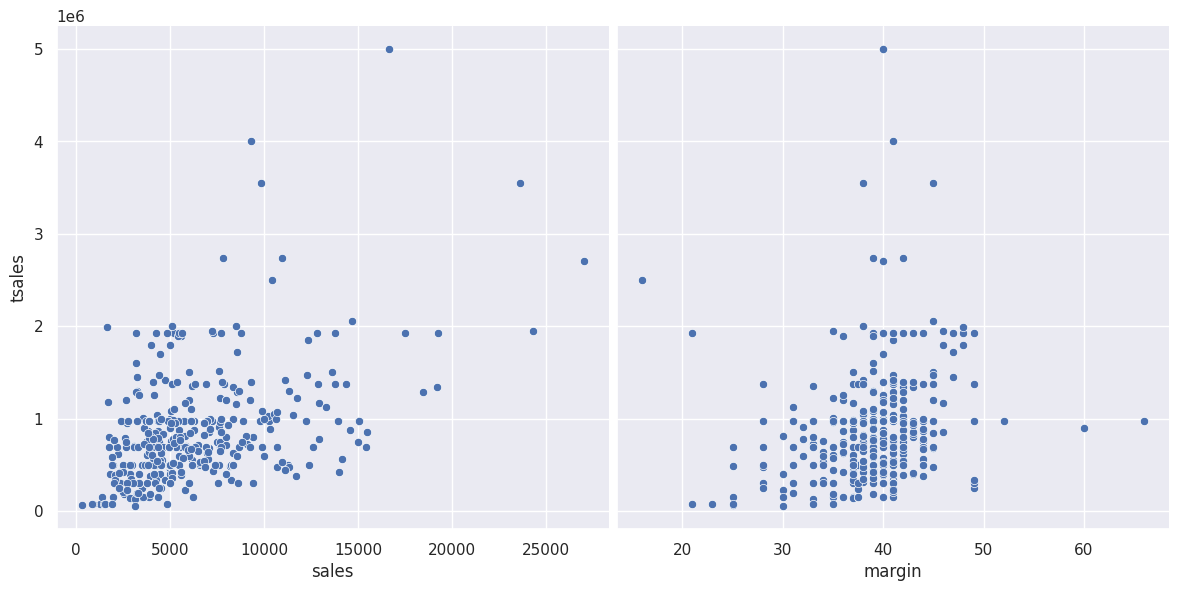

In [7]:
#Plotting continuous IV against dependent variable
sns.set(font_scale = 1)
sns.pairplot(data = df,
             y_vars = 'tsales',
             x_vars = ['sales', 'margin'],
             height = 6)

<Axes: >

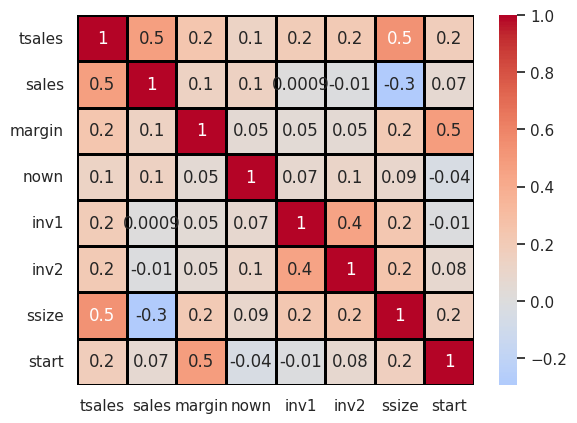

In [8]:
#Correlation Matrix
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidths=1,
            linecolor = 'black')

#Multilinear regression preperation

In [12]:
#Isolate X and Y
y = df.tsales
x = df.drop(columns = ['tsales'])
x = sm.add_constant(x)
x.head()

,const,sales,margin,nown,inv1,inv2,ssize,start
0,1.0,4411.765,41.0,1.0,17166.67,27177.04,170,41.0
1,1.0,4280.878,39.0,2.0,17166.67,27177.04,450,39.0
2,1.0,4166.667,40.0,1.0,292857.20,71570.55,300,40.0
3,1.0,2670.104,40.0,1.0,22207.04,15000.00,260,40.0
4,1.0,15000.000,44.0,2.0,22207.04,10000.00,50,44.0


In [13]:
#Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
X_train.head(2)

,const,sales,margin,nown,inv1,inv2,ssize,start
201,1.0,4815.987,42.0,3.0,22207.04,400000.0,400,42.0
25,1.0,3756.250,35.0,1.0,62269.23,20000.0,160,35.0


#Multilinear Regression

In [14]:
#Regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     150.1
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           6.67e-96
Time:                        03:30:51   Log-Likelihood:                -4458.9
No. Observations:                 320   AIC:                             8934.
Df Residuals:                     312   BIC:                             8964.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.603e+05    1.2e+05     -3.002      0.0

#Accuracy Assessment

In [15]:
#Predict
predictions = model.predict(X_test)
predictions[:2]

,0
270,2.405911e+06
380,5.581862e+05


In [16]:
#Accuracy Assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", round(mean_absolute_error(y_test, predictions)))
print("RSME:", round(np.sqrt(mean_squared_error(y_test, predictions)), 1))

MAE: 212814
RSME: 451742.3
